In [49]:
import cv2
import os
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
img = cv2.imread('images/car2.jpg')

In [77]:
def plot_image(img1,img2, title1="",title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap='gray')
    ax1.set(xticks=[],yticks=[],title = title1)
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap='gray')
    ax2.set(xticks=[],yticks=[],title = title2)

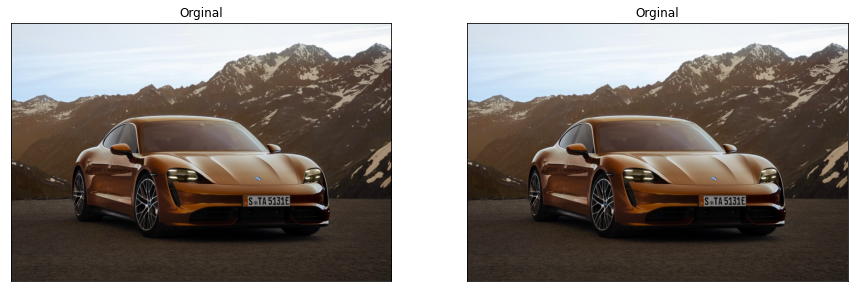

In [78]:
plot_image(img, img, title1='Orginal',title2='Orginal')

In [79]:
gray_img =cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


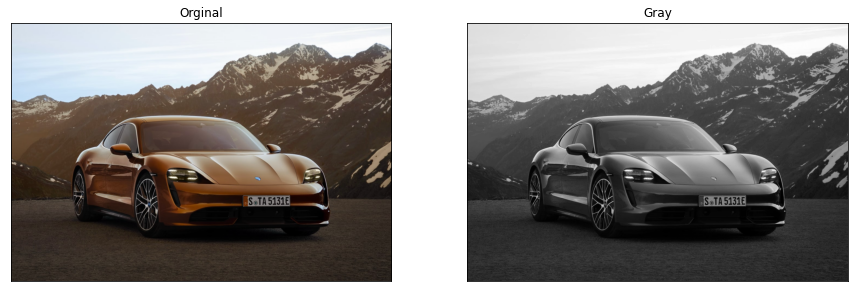

In [80]:
plot_image(img, gray_img, title1='Orginal',title2='Gray')

In [81]:
blur =cv2.bilateralFilter(gray_img, 11,90,90)

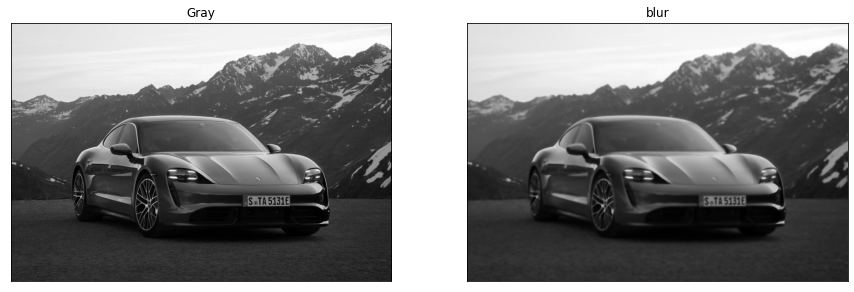

In [82]:
plot_image(gray_img, blur, title1='Gray',title2='blur')

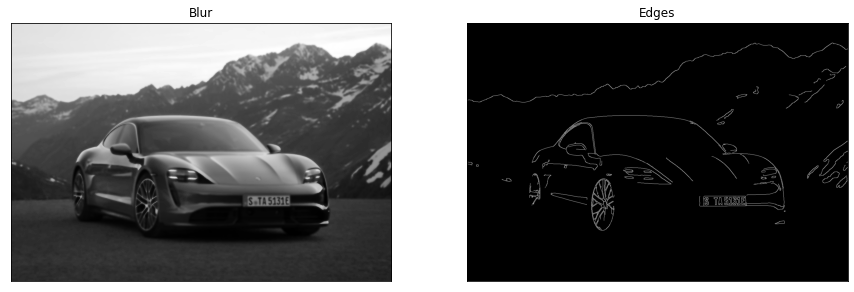

In [83]:
edges = cv2.Canny(blur,30,200)
plot_image(blur, edges, title1='Blur',title2='Edges')

In [84]:
cnts,new = cv2.findContours(edges.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [85]:
image_copy = img.copy()

In [86]:
_=cv2.drawContours(image_copy,cnts,-1,(255,0,255),2)

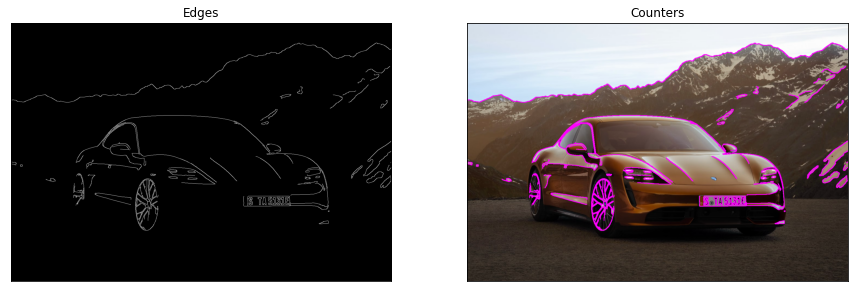

In [87]:
plot_image(edges,image_copy, title1='Edges',title2='Counters')

In [88]:
print(len(cnts))

153


In [89]:
cnts = sorted(cnts,key=cv2.contourArea,reverse=True)[:10]

In [90]:
image_reduce = img.copy()

In [91]:
_=cv2.drawContours(image_reduce,cnts,-1,(255,0,255),2)

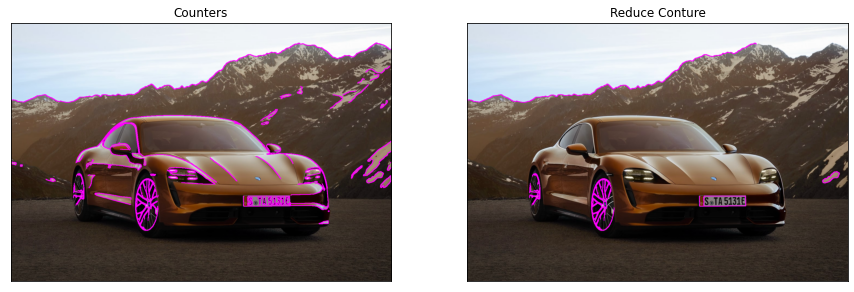

In [92]:
plot_image(image_copy,image_reduce, title1='Counters',title2='Reduce Conture')

In [93]:
plate = None
for i in cnts:
    perimeter = cv2.arcLength(i,True)
    edge_conture = cv2.approxPolyDP(i,0.02*perimeter,True)
    if len(edge_conture)==4:
        x,y,w,h = cv2.boundingRect(i)
        plate=img[y:y+h,x:x+w]
        break
cv2.imwrite('image.jpg',plate)

True

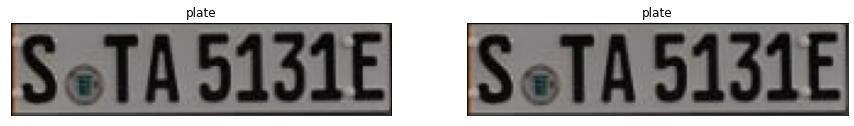

In [94]:
plot_image(plate,plate, title1='plate',title2='plate')

In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [96]:
text1 = pytesseract.image_to_string(plate,lang='eng')

In [97]:
print(text1)

 

SeTA5131E



In [98]:
import easyocr


In [99]:
rander = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [100]:
results = rander.readtext(plate)

In [101]:
print(results)

[([[0, 0], [156, 0], [156, 38], [0, 38]], 'SoTA 5131E7', 0.3070815571552554)]
